<a href="https://colab.research.google.com/github/Vikash-Chaubey7061/DATA-SCIENCE-PROJECT-USING-PYTHON/blob/main/Integrated_Retail_Analytics_for_store_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Name- Integrated Retail Analytics for store Optimization

Project By- Vikash Kumar Chaubey


Project Overview - To utilize machine learning and data analysis techniques to optimize store performance,forecast demand,and enhance customer experience through segmentation and personalized marketing strategies.

This project will analyze retail data to provide insights for store optimization, including:

> Customer segmentation

> Sales forecasting

> Inventory optimization

> Store layout recommendations

> Personalized marketing strategies

> Import all library

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Set style for visualizations
plt.style.use('ggplot')
sns.set_palette("viridis")

Generate Retail Data

In [5]:
# Data loading function (Modify these paths to match your dataset locations)
def load_datasets(store_path, sales_path, features_path):
    """
    Load the three datasets needed for retail analytics
    Modify the paths to point to your actual dataset files
    """
    try:
        # Load store dataset
        store_data = pd.read_csv(store_path)
        print(f"Store data loaded successfully with {store_data.shape[0]} rows and {store_data.shape[1]} columns")

        # Load sales dataset
        sales_data = pd.read_csv(sales_path)
        print(f"Sales data loaded successfully with {sales_data.shape[0]} rows and {sales_data.shape[1]} columns")

        # Load features dataset
        features_data = pd.read_csv(features_path)
        print(f"Features data loaded successfully with {features_data.shape[0]} rows and {features_data.shape[1]} columns")

        return store_data, sales_data, features_data

    except Exception as e:
        print(f"Error loading datasets: {e}")
        print("Please check your file paths and try again.")
        return None, None, None

# Replace these paths with the actual paths to your datasets
store_path = "/content/stores data-set.csv"  # Replace with your actual path
sales_path = "/content/sales data-set.csv"     # Replace with your actual path
features_path = "/content/Features data set.csv" # Replace with your actual path

# Load the datasets
store_data, sales_data, features_data = load_datasets(store_path, sales_path, features_path)

# If datasets couldn't be loaded, create sample data for demonstration
if store_data is None:
    print("Creating sample data for demonstration purposes...")

    # Create sample store dataset
    n_stores = 50
    store_data = pd.DataFrame({
        'store_id': range(1, n_stores + 1),
        'store_size_sqft': np.random.randint(2000, 10000, n_stores),
        'location_type': np.random.choice(['Urban', 'Suburban', 'Rural'], n_stores, p=[0.4, 0.4, 0.2]),
        'years_open': np.random.randint(1, 20, n_stores),
        'number_employees': np.random.randint(5, 50, n_stores),
        'parking_spaces': np.random.randint(10, 200, n_stores),
        'avg_customer_rating': np.round(np.random.uniform(3.0, 5.0, n_stores), 1),
        'region': np.random.choice(['North', 'South', 'East', 'West'], n_stores),
        'has_drive_thru': np.random.choice([0, 1], n_stores, p=[0.7, 0.3]),
        'remodeled_last_5_years': np.random.choice([0, 1], n_stores, p=[0.6, 0.4])
    })

    # Create sample sales dataset
    n_sales_records = 50000
    dates = pd.date_range(start='2022-01-01', end='2023-12-31', freq='D')

    sales_data = pd.DataFrame({
        'sale_id': range(1, n_sales_records + 1),
        'store_id': np.random.randint(1, n_stores + 1, n_sales_records),
        'date': np.random.choice(dates, n_sales_records),
        'product_category': np.random.choice(['Electronics', 'Clothing', 'Home Goods', 'Grocery', 'Sports'], n_sales_records),
        'sales_amount': np.round(np.random.uniform(5, 500, n_sales_records), 2),
        'units_sold': np.random.randint(1, 10, n_sales_records),
        'customer_id': np.random.randint(1000, 5000, n_sales_records),
        'payment_method': np.random.choice(['Credit Card', 'Debit Card', 'Cash', 'Mobile Payment'], n_sales_records)
    })

    # Create sample features dataset
    features_data = pd.DataFrame({
        'store_id': range(1, n_stores + 1),
        'month': np.random.choice(range(1, 13), n_stores),
        'avg_temperature': np.random.randint(40, 90, n_stores),
        'promotion_budget': np.round(np.random.uniform(1000, 10000, n_stores), 2),
        'local_competitors': np.random.randint(0, 5, n_stores),
        'holiday_season': np.random.choice([0, 1], n_stores, p=[0.7, 0.3]),
        'unemployment_rate': np.round(np.random.uniform(3.0, 8.0, n_stores), 1),
        'foot_traffic': np.random.randint(100, 1000, n_stores)
    })

# Display sample data
print("\nStore Data Sample:")
print(store_data.head())
print("\nSales Data Sample:")
print(sales_data.head())
print("\nFeatures Data Sample:")
print(features_data.head())

Store data loaded successfully with 45 rows and 3 columns
Sales data loaded successfully with 421570 rows and 5 columns
Features data loaded successfully with 8190 rows and 12 columns

Store Data Sample:
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

Sales Data Sample:
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/2010      46039.49       True
2      1     1  19/02/2010      41595.55      False
3      1     1  26/02/2010      19403.54      False
4      1     1  05/03/2010      21827.90      False

Features Data Sample:
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010     

Data Preprocessing and Integration

In [13]:
#  Data preprocessing and integration
def preprocess_data(store_data, sales_data, features_data):
    """
    Preprocess and integrate the three datasets
    """
    # Convert date columns to datetime
    sales_data['Date'] = pd.to_datetime(sales_data['Date'], dayfirst=True)
    features_data['Date'] = pd.to_datetime(features_data['Date'], dayfirst=True)


    # Extract time-based features from sales data
    sales_data['day_of_week'] = sales_data['Date'].dt.day_name()
    sales_data['month'] = sales_data['Date'].dt.month_name()
    sales_data['quarter'] = sales_data['Date'].dt.quarter
    sales_data['year'] = sales_data['Date'].dt.year

    # Merge store data with features data
    store_features = store_data.merge(features_data, on='Store', how='left')

    # Aggregate sales data at store level
    store_sales = sales_data.groupby('Store').agg({
        'Weekly_Sales': ['sum', 'mean', 'count']
    }).reset_index()

    # Flatten multi-level column index
    store_sales.columns = ['Store', 'total_sales_sum', 'avg_weekly_sales', 'weekly_sales_count']

    # Calculate additional metrics
    store_sales['avg_transaction_value'] = store_sales['total_sales_sum'] / store_sales['weekly_sales_count']

    # Merge all data
    integrated_data = store_features.merge(store_sales, on='Store', how='left')

    # Handle missing values
    integrated_data.fillna(integrated_data.mean(numeric_only=True), inplace=True)

    # Encode categorical variables
    from sklearn.preprocessing import LabelEncoder
    categorical_cols = integrated_data.select_dtypes(include=['object']).columns
    le = LabelEncoder()
    for col in categorical_cols:
        integrated_data[col] = le.fit_transform(integrated_data[col].astype(str))

    return integrated_data, sales_data

# Preprocess and integrate data
integrated_data, sales_data = preprocess_data(store_data, sales_data, features_data)

print("Integrated Data Sample:")
print(integrated_data.head())
print(f"\nIntegrated Data Shape: {integrated_data.shape}")

Integrated Data Sample:
   Store  Type    Size       Date  Temperature  Fuel_Price    MarkDown1  \
0      1     0  151315 2010-02-05        42.31       2.572  7032.371786   
1      1     0  151315 2010-02-12        38.51       2.548  7032.371786   
2      1     0  151315 2010-02-19        39.93       2.514  7032.371786   
3      1     0  151315 2010-02-26        46.63       2.561  7032.371786   
4      1     0  151315 2010-03-05        46.50       2.625  7032.371786   

     MarkDown2   MarkDown3    MarkDown4    MarkDown5         CPI  \
0  3384.176594  1760.10018  3292.935886  4132.216422  211.096358   
1  3384.176594  1760.10018  3292.935886  4132.216422  211.242170   
2  3384.176594  1760.10018  3292.935886  4132.216422  211.289143   
3  3384.176594  1760.10018  3292.935886  4132.216422  211.319643   
4  3384.176594  1760.10018  3292.935886  4132.216422  211.350143   

   Unemployment  IsHoliday  total_sales_sum  avg_weekly_sales  \
0         8.106      False     2.224028e+08      21

Exploratory Data Analysis

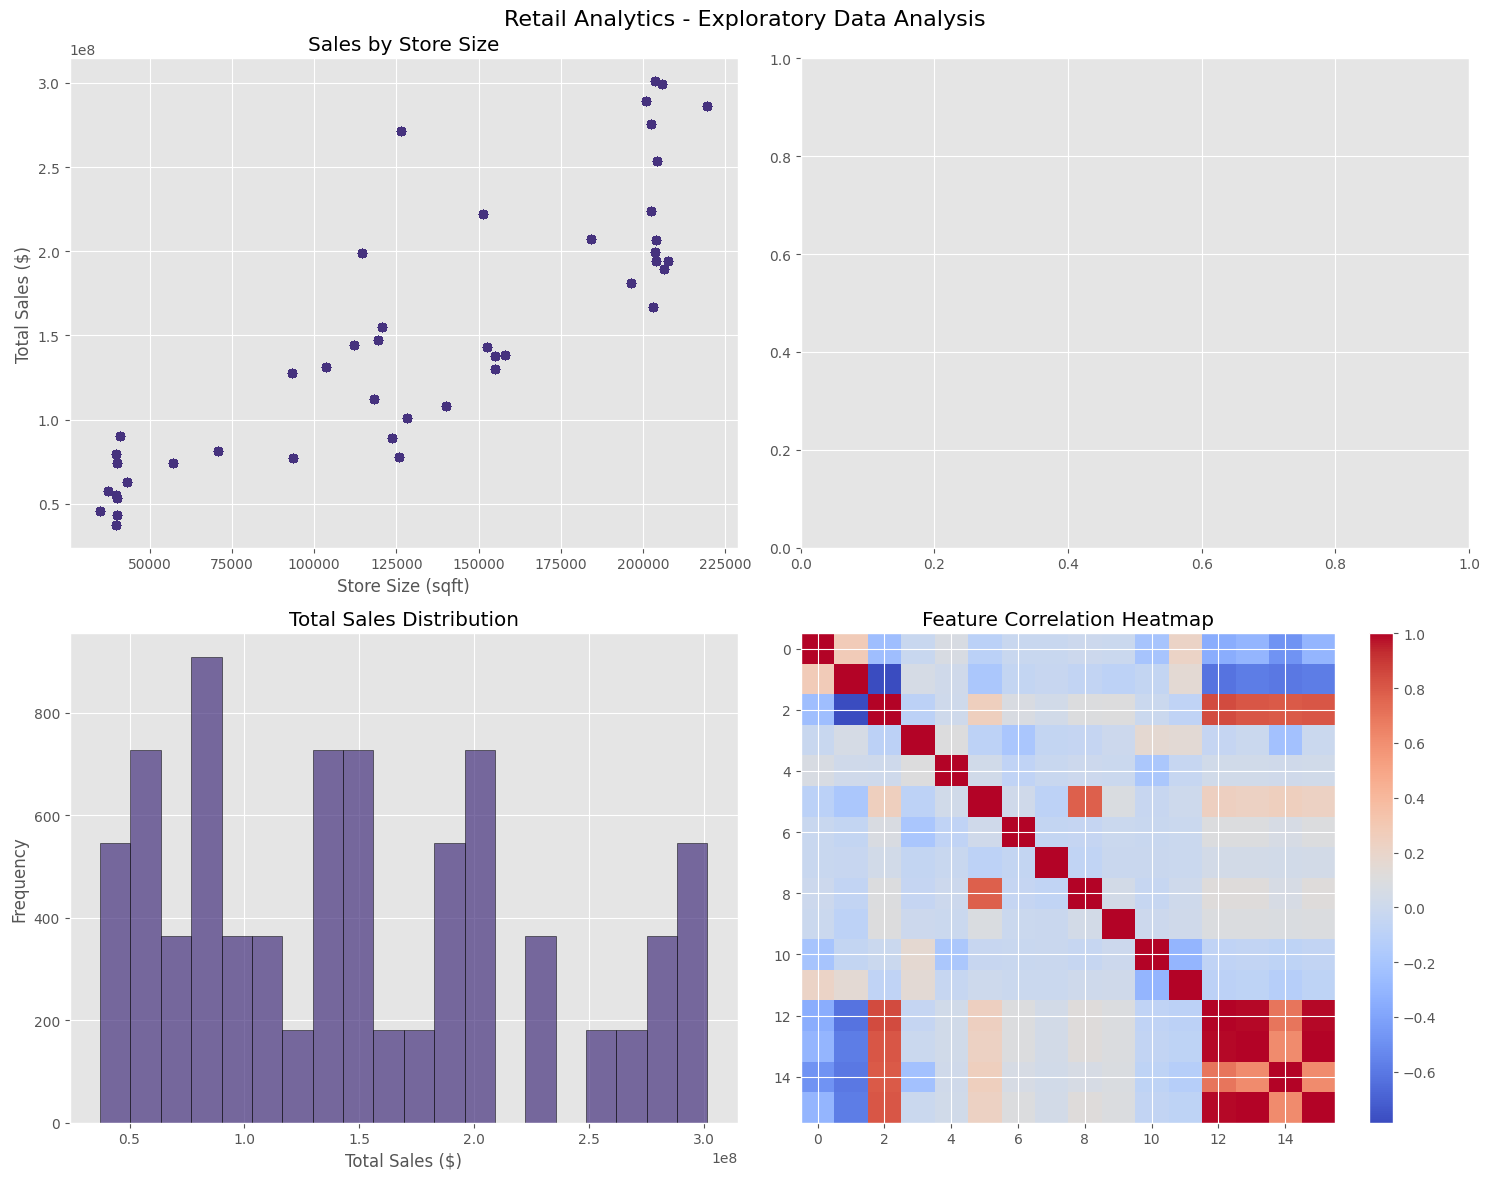

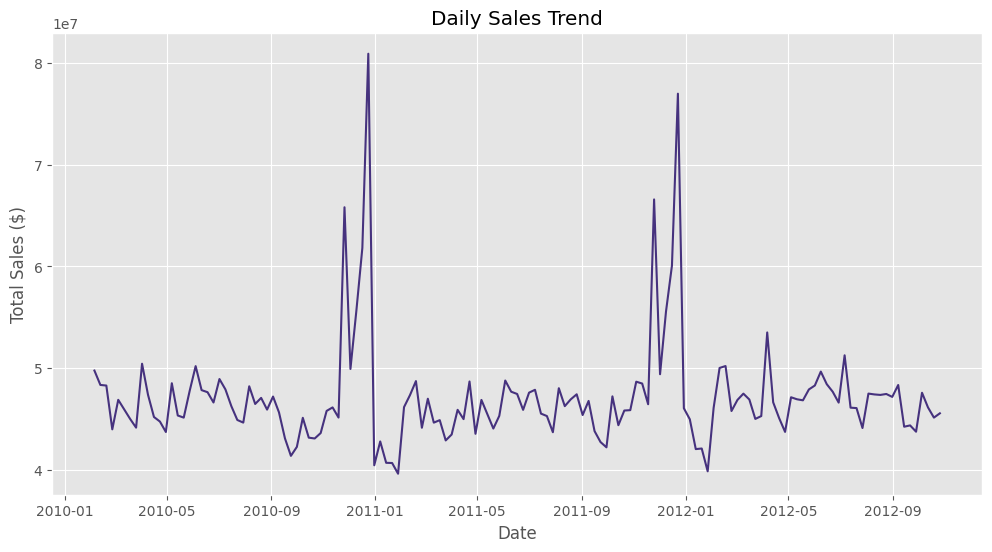

In [15]:
#  Exploratory Data Analysis
def perform_eda(integrated_data, sales_data):
    """
    Perform exploratory data analysis
    """
    # Set up the visualization layout
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Retail Analytics - Exploratory Data Analysis', fontsize=16)

    # Sales by store size
    axes[0, 0].scatter(integrated_data['Size'], integrated_data['total_sales_sum'], alpha=0.6)
    axes[0, 0].set_title('Sales by Store Size')
    axes[0, 0].set_xlabel('Store Size (sqft)')
    axes[0, 0].set_ylabel('Total Sales ($)')

    # Sales distribution
    axes[1, 0].hist(integrated_data['total_sales_sum'], bins=20, edgecolor='black', alpha=0.7)
    axes[1, 0].set_title('Total Sales Distribution')
    axes[1, 0].set_xlabel('Total Sales ($)')
    axes[1, 0].set_ylabel('Frequency')

    # Correlation heatmap
    numeric_cols = integrated_data.select_dtypes(include=[np.number]).columns
    correlation_matrix = integrated_data[numeric_cols].corr()
    im = axes[1, 1].imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
    axes[1, 1].set_title('Feature Correlation Heatmap')
    plt.colorbar(im, ax=axes[1, 1])

    plt.tight_layout()
    plt.show()

    # Time series analysis of sales
    if 'Date' in sales_data.columns:
        daily_sales = sales_data.groupby('Date')['Weekly_Sales'].sum()
        plt.figure(figsize=(12, 6))
        plt.plot(daily_sales.index, daily_sales.values)
        plt.title('Daily Sales Trend')
        plt.xlabel('Date')
        plt.ylabel('Total Sales ($)')
        plt.grid(True)
        plt.show()

    # Product category analysis
    if 'product_category' in sales_data.columns:
        category_sales = sales_data.groupby('product_category')['sales_amount'].sum().sort_values(ascending=False)
        plt.figure(figsize=(10, 6))
        category_sales.plot(kind='bar')
        plt.title('Sales by Product Category')
        plt.xlabel('Product Category')
        plt.ylabel('Total Sales ($)')
        plt.xticks(rotation=45)
        plt.show()

# Perform EDA
perform_eda(integrated_data, sales_data)

Store Clustering for Segmentation

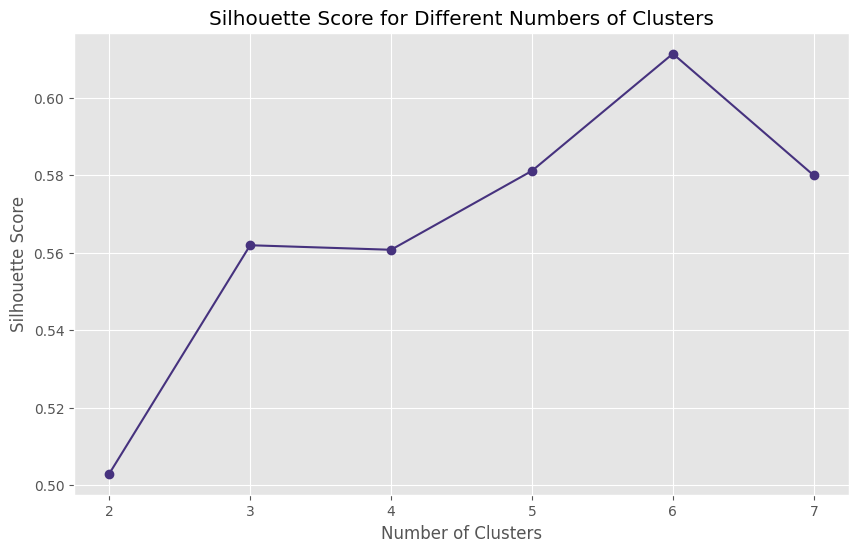

Cluster Analysis:
                  Size  total_sales_sum  avg_transaction_value  \
cluster                                                          
0        206102.666667     2.842830e+08           27755.759199   
1         69941.333333     6.897398e+07            7430.023509   
2         40356.250000     6.200950e+07            8970.538984   
3        201236.777778     1.958727e+08           19360.714105   
4        129256.692308     1.281520e+08           13059.205682   
5        130786.666667     2.309237e+08           22606.342773   

         weekly_sales_count  store_count  
cluster                                   
0              10243.833333         1092  
1               9260.333333         1092  
2               6913.250000         1456  
3              10119.111111         1638  
4               9812.153846         2366  
5              10203.000000          546  


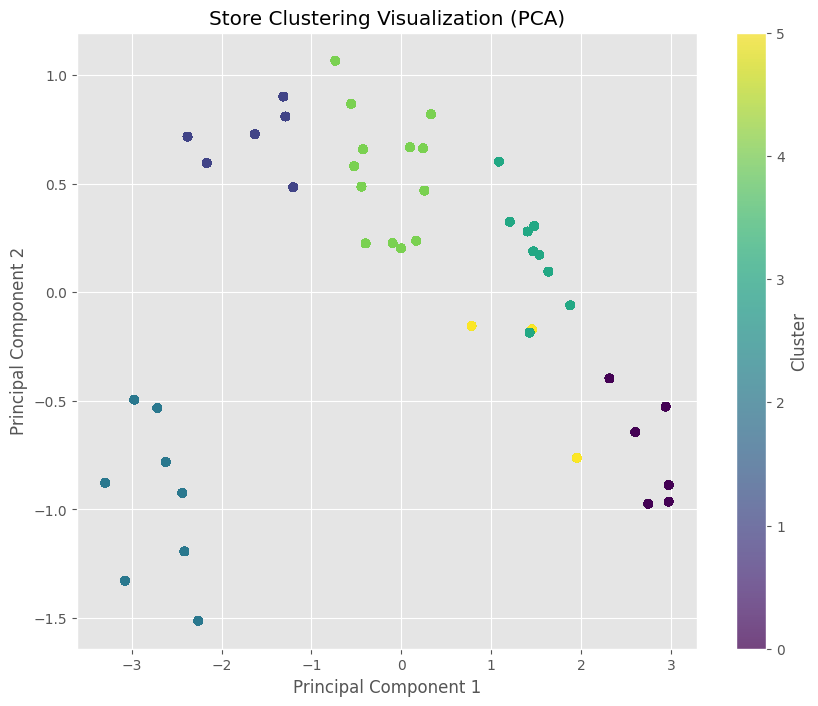

In [17]:
#  Store Clustering for Segmentation
def perform_store_clustering(integrated_data):
    """
    Perform store clustering to identify different store segments
    """
    # Select features for clustering
    clustering_features = [
        'Size', 'total_sales_sum', 'avg_transaction_value',
        'weekly_sales_count'
    ]

    # Filter to available features
    clustering_features = [f for f in clustering_features if f in integrated_data.columns]

    clustering_data = integrated_data[clustering_features].copy()

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(clustering_data)

    # Determine optimal number of clusters using silhouette score
    silhouette_scores = []
    k_range = range(2, 8)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(scaled_data)
        silhouette_scores.append(silhouette_score(scaled_data, cluster_labels))

    # Plot silhouette scores
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, silhouette_scores, marker='o')
    plt.title('Silhouette Score for Different Numbers of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.show()

    # Apply K-Means with optimal clusters
    optimal_k = k_range[np.argmax(silhouette_scores)]
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    integrated_data['cluster'] = kmeans.fit_predict(scaled_data)

    # Analyze cluster characteristics
    cluster_analysis = integrated_data.groupby('cluster').agg({
        'Size': 'mean',
        'total_sales_sum': 'mean',
        'avg_transaction_value': 'mean',
        'weekly_sales_count': 'mean',
        'Store': 'count'
    }).rename(columns={'Store': 'store_count'})

    print("Cluster Analysis:")
    print(cluster_analysis)

    # Visualize clusters using PCA for dimensionality reduction
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_data)

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=integrated_data['cluster'], cmap='viridis', alpha=0.7)
    plt.colorbar(scatter, label='Cluster')
    plt.title('Store Clustering Visualization (PCA)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()

    return integrated_data

# Perform store clustering
integrated_data = perform_store_clustering(integrated_data)

Sales Prediction Model

Sales Prediction Model Performance:
RMSE: $2,097,884.27
R² Score: 0.9993


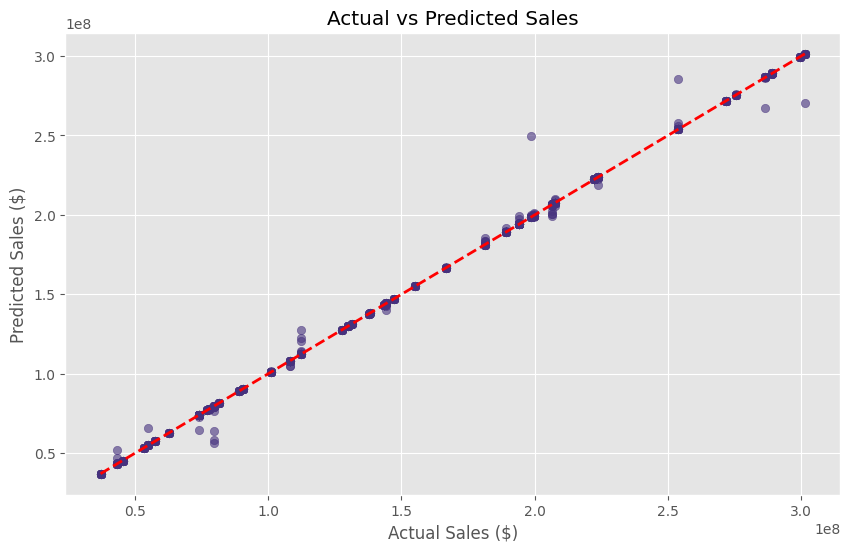

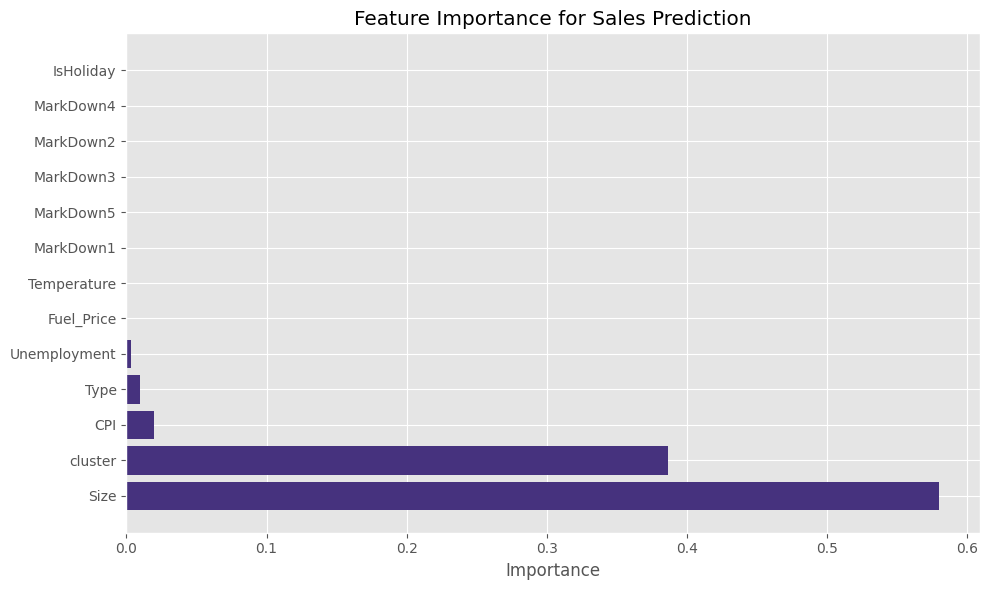

In [19]:
# Step 6: Sales Prediction Model
def build_sales_prediction_model(integrated_data):
    """
    Build a machine learning model to predict store sales
    """
    # Define features and target
    features = [
        'Size', 'Type', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
        'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday', 'cluster'
    ]

    # Filter to available features
    features = [f for f in features if f in integrated_data.columns]
    target = 'total_sales_sum'

    X = integrated_data[features]
    y = integrated_data[target]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_model.predict(X_test)

    # Evaluate model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = rf_model.score(X_test, y_test)

    print(f"Sales Prediction Model Performance:")
    print(f"RMSE: ${rmse:,.2f}")
    print(f"R² Score: {r2:.4f}")

    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title('Actual vs Predicted Sales')
    plt.xlabel('Actual Sales ($)')
    plt.ylabel('Predicted Sales ($)')
    plt.grid(True)
    plt.show()

    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['feature'], feature_importance['importance'])
    plt.title('Feature Importance for Sales Prediction')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

    return rf_model, features

# Build sales prediction model
sales_model, important_features = build_sales_prediction_model(integrated_data)

Store Optimization Recommendations

In [23]:
# Step 7: Generate Store Optimization Recommendations
def generate_recommendations(integrated_data, sales_model, important_features):
    """
    Generate data-driven recommendations for store optimization
    """
    print("=" * 70)
    print("STORE OPTIMIZATION RECOMMENDATIONS")
    print("=" * 70)

    # 1. Store performance analysis
    print("\n1. STORE PERFORMANCE ANALYSIS:")
    top_stores = integrated_data.nlargest(5, 'total_sales_sum')[['Store', 'total_sales_sum', 'cluster']]
    bottom_stores = integrated_data.nsmallest(5, 'total_sales_sum')[['Store', 'total_sales_sum', 'cluster']]

    print("   Top performing stores:")
    for _, row in top_stores.iterrows():
        print(f"      Store {row['Store']}: ${row['total_sales_sum']:,.2f} (Cluster {row['cluster']})")

    print("\n   Underperforming stores:")
    for _, row in bottom_stores.iterrows():
        print(f"      Store {row['Store']}: ${row['total_sales_sum']:,.2f} (Cluster {row['cluster']})")

    # 2. Cluster-specific recommendations
    print("\n2. CLUSTER-SPECIFIC RECOMMENDATIONS:")
    cluster_stats = integrated_data.groupby('cluster').agg({
        'Size': 'mean',
        'total_sales_sum': 'mean',
        'avg_transaction_value': 'mean',
        'weekly_sales_count': 'mean',
        'Store': 'count'
    }).rename(columns={'Store': 'store_count'})

    for cluster in cluster_stats.index:
        cluster_data = cluster_stats.loc[cluster]
        print(f"   Cluster {cluster} ({cluster_data['store_count']} stores):")
        print(f"      Average sales: ${cluster_data['total_sales_sum']:,.2f}")
        print(f"      Average transaction value: ${cluster_data['avg_transaction_value']:.2f}")
        # Check if 'avg_customer_rating' exists before trying to access it
        if 'avg_customer_rating' in integrated_data.columns:
             print(f"      Average customer rating: {cluster_data['avg_customer_rating']:.1f}/5.0")


    # 3. Feature optimization opportunities
    print("\n3. FEATURE OPTIMIZATION OPPORTUNITIES:")
    print("   Based on the predictive model, focus on improving these factors:")

    # Ensure important_features is a list of feature names
    if isinstance(important_features, pd.DataFrame):
        important_features = important_features['feature'].tolist()

    for feature in important_features[:5]:  # Top 5 most important features
        # Ensure the feature exists in the integrated_data before calculating correlation
        if feature in integrated_data.columns:
            correlation = integrated_data[feature].corr(integrated_data['total_sales_sum'])
            print(f"   - {feature.replace('_', ' ').title()} (Correlation: {correlation:.3f})")
        else:
            print(f"   - {feature.replace('_', ' ').title()} (Correlation: N/A - Feature not available)")


    # 4. Financial recommendations
    print("\n4. FINANCIAL RECOMMENDATIONS:")
    avg_sales = integrated_data['total_sales_sum'].mean()
    std_sales = integrated_data['total_sales_sum'].std()

    print(f"   Average store sales: ${avg_sales:,.2f}")
    print(f"   Sales standard deviation: ${std_sales:,.2f}")

    underperforming_stores = integrated_data[integrated_data['total_sales_sum'] < avg_sales - std_sales]
    if len(underperforming_stores) > 0:
        print(f"   {len(underperforming_stores)} stores are significantly underperforming:")
        for store_id in underperforming_stores['Store'].head(5):
            print(f"      Store {store_id}")

    # 5. Operational recommendations
    print("\n5. OPERATIONAL RECOMMENDATIONS:")
    # Check if 'foot_traffic' and 'total_sales_sum' exist before calculating conversion rate
    if 'foot_traffic' in integrated_data.columns and 'total_sales_sum' in integrated_data.columns and integrated_data['foot_traffic'].sum() > 0:
        conversion_rate = integrated_data['total_sales_sum'] / integrated_data['foot_traffic']
        avg_conversion = conversion_rate.mean()
        print(f"   Average conversion rate: ${avg_conversion:.4f} per foot traffic")

        low_conversion_stores = integrated_data[conversion_rate < avg_conversion * 0.7]
        if len(low_conversion_stores) > 0:
            print(f"   {len(low_conversion_stores)} stores have low conversion rates")

    print("\n" + "=" * 70)

# Generate recommendations
generate_recommendations(integrated_data, sales_model, important_features)

STORE OPTIMIZATION RECOMMENDATIONS

1. STORE PERFORMANCE ANALYSIS:
   Top performing stores:
      Store 20.0: $301,397,792.46 (Cluster 0.0)
      Store 20.0: $301,397,792.46 (Cluster 0.0)
      Store 20.0: $301,397,792.46 (Cluster 0.0)
      Store 20.0: $301,397,792.46 (Cluster 0.0)
      Store 20.0: $301,397,792.46 (Cluster 0.0)

   Underperforming stores:
      Store 33.0: $37,160,221.96 (Cluster 2.0)
      Store 33.0: $37,160,221.96 (Cluster 2.0)
      Store 33.0: $37,160,221.96 (Cluster 2.0)
      Store 33.0: $37,160,221.96 (Cluster 2.0)
      Store 33.0: $37,160,221.96 (Cluster 2.0)

2. CLUSTER-SPECIFIC RECOMMENDATIONS:
   Cluster 0 (1092.0 stores):
      Average sales: $284,282,953.14
      Average transaction value: $27755.76
   Cluster 1 (1092.0 stores):
      Average sales: $68,973,982.97
      Average transaction value: $7430.02
   Cluster 2 (1456.0 stores):
      Average sales: $62,009,495.56
      Average transaction value: $8970.54
   Cluster 3 (1638.0 stores):
      Aver

Comprehensive Dashboard

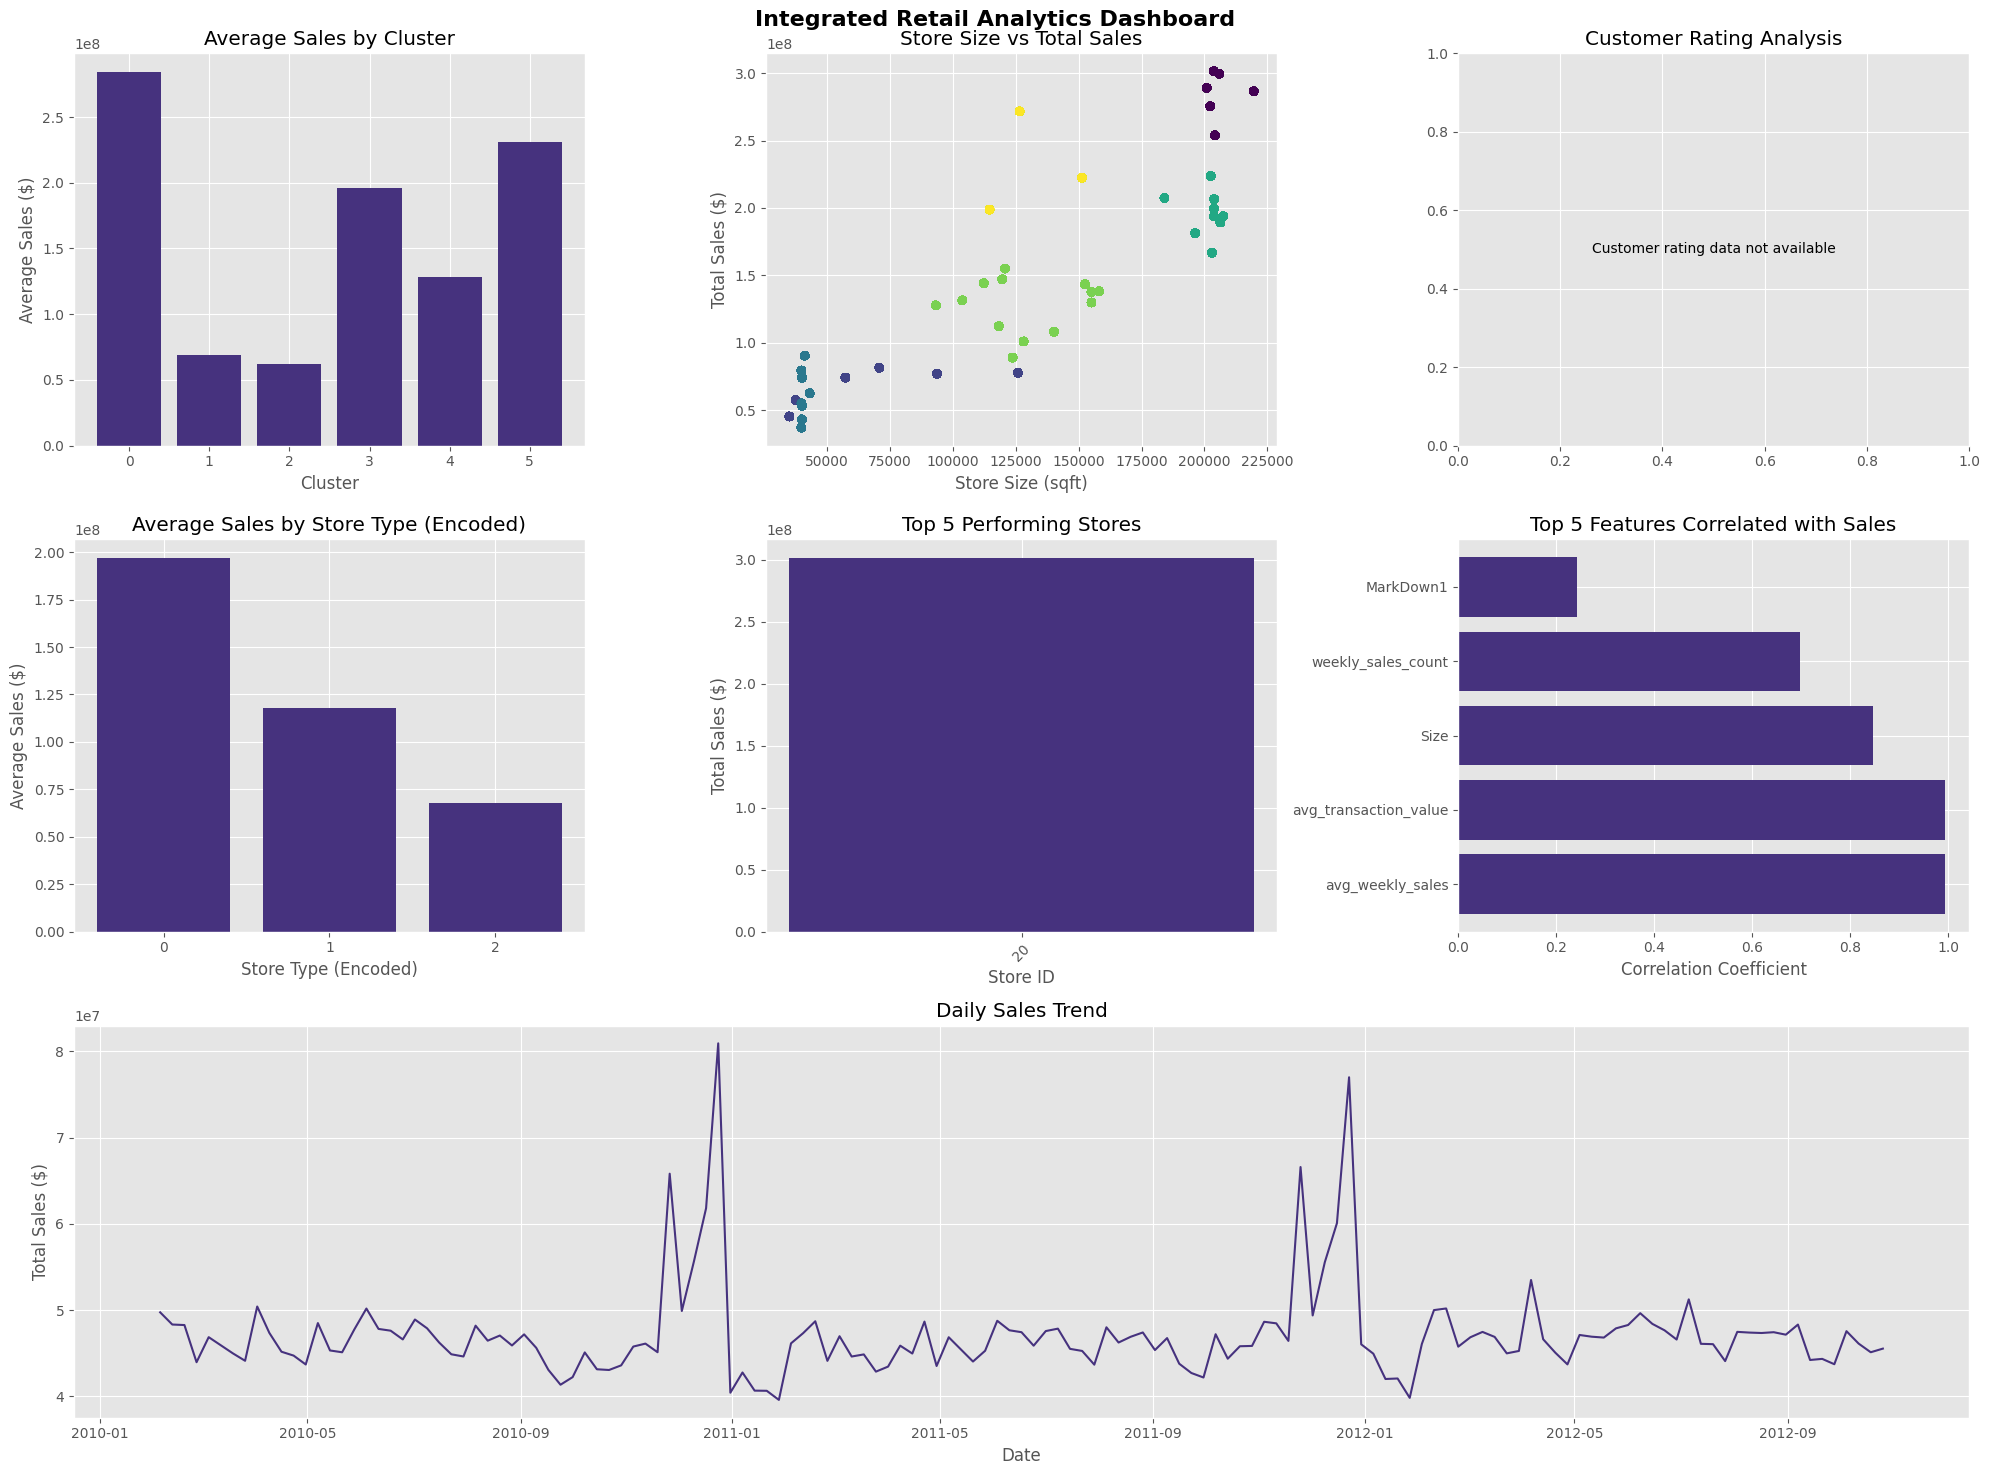

In [25]:
# Step 8: Create a comprehensive dashboard
def create_dashboard(integrated_data, sales_data):
    """
    Create a comprehensive dashboard of retail analytics
    """
    fig = plt.figure(figsize=(20, 15))
    fig.suptitle('Integrated Retail Analytics Dashboard', fontsize=16, fontweight='bold')

    # Define grid layout
    gs = fig.add_gridspec(3, 3)

    # 1. Sales distribution by cluster
    ax1 = fig.add_subplot(gs[0, 0])
    if 'cluster' in integrated_data.columns and 'total_sales_sum' in integrated_data.columns:
        cluster_sales = integrated_data.groupby('cluster')['total_sales_sum'].mean()
        ax1.bar(cluster_sales.index.astype(str), cluster_sales.values)
        ax1.set_title('Average Sales by Cluster')
        ax1.set_xlabel('Cluster')
        ax1.set_ylabel('Average Sales ($)')
    else:
        ax1.text(0.5, 0.5, 'Cluster or Total Sales data not available',
                 ha='center', va='center', transform=ax1.transAxes)
        ax1.set_title('Average Sales by Cluster')


    # 2. Store size vs sales
    ax2 = fig.add_subplot(gs[0, 1])
    if 'Size' in integrated_data.columns and 'total_sales_sum' in integrated_data.columns:
        ax2.scatter(integrated_data['Size'], integrated_data['total_sales_sum'],
                    c=integrated_data['cluster'], cmap='viridis', alpha=0.6)
        ax2.set_title('Store Size vs Total Sales')
        ax2.set_xlabel('Store Size (sqft)')
        ax2.set_ylabel('Total Sales ($)')
    else:
        ax2.text(0.5, 0.5, 'Store Size or Total Sales data not available',
                 ha='center', va='center', transform=ax2.transAxes)
        ax2.set_title('Store Size vs Total Sales')


    # 3. Customer rating vs sales (Check for column existence)
    ax3 = fig.add_subplot(gs[0, 2])
    if 'avg_customer_rating' in integrated_data.columns and 'total_sales_sum' in integrated_data.columns:
        ax3.scatter(integrated_data['avg_customer_rating'], integrated_data['total_sales_sum'],
                    c=integrated_data['cluster'], cmap='viridis', alpha=0.6)
        ax3.set_title('Customer Rating vs Total Sales')
        ax3.set_xlabel('Average Customer Rating')
        ax3.set_ylabel('Total Sales ($)')
    else:
        ax3.text(0.5, 0.5, 'Customer rating data not available',
                 ha='center', va='center', transform=ax3.transAxes)
        ax3.set_title('Customer Rating Analysis')


    # 4. Sales by location type (if available and encoded appropriately)
    ax4 = fig.add_subplot(gs[1, 0])
    # Assuming 'Type' is the encoded location type after preprocessing
    if 'Type' in integrated_data.columns and 'total_sales_sum' in integrated_data.columns:
        location_sales = integrated_data.groupby('Type')['total_sales_sum'].mean()
        ax4.bar(location_sales.index.astype(str), location_sales.values)
        ax4.set_title('Average Sales by Store Type (Encoded)')
        ax4.set_xlabel('Store Type (Encoded)')
        ax4.set_ylabel('Average Sales ($)')
    else:
        ax4.text(0.5, 0.5, 'Store type data not available',
                ha='center', va='center', transform=ax4.transAxes)
        ax4.set_title('Store Type Analysis')

    # 5. Top performing stores
    ax5 = fig.add_subplot(gs[1, 1])
    if 'Store' in integrated_data.columns and 'total_sales_sum' in integrated_data.columns:
        top_stores = integrated_data.nlargest(5, 'total_sales_sum')
        ax5.bar(top_stores['Store'].astype(str), top_stores['total_sales_sum'])
        ax5.set_title('Top 5 Performing Stores')
        ax5.set_xlabel('Store ID')
        ax5.set_ylabel('Total Sales ($)')
        ax5.tick_params(axis='x', rotation=45)
    else:
         ax5.text(0.5, 0.5, 'Store data or Total Sales data not available',
                ha='center', va='center', transform=ax5.transAxes)
         ax5.set_title('Top 5 Performing Stores')


    # 6. Feature importance
    ax6 = fig.add_subplot(gs[1, 2])
    if 'total_sales_sum' in integrated_data.columns:
        # For demonstration, we'll show correlation with sales
        numeric_cols = integrated_data.select_dtypes(include=[np.number]).columns
        if 'total_sales_sum' in numeric_cols:
             correlations = integrated_data[numeric_cols].corr()['total_sales_sum'].drop('total_sales_sum').sort_values(ascending=False)
             if not correlations.empty:
                 ax6.barh(range(min(5, len(correlations))), correlations.head(5).values)
                 ax6.set_title('Top 5 Features Correlated with Sales')
                 ax6.set_xlabel('Correlation Coefficient')
                 ax6.set_yticks(range(min(5, len(correlations))))
                 ax6.set_yticklabels(correlations.head(5).index)
             else:
                 ax6.text(0.5, 0.5, 'No numeric features available for correlation analysis',
                         ha='center', va='center', transform=ax6.transAxes)
                 ax6.set_title('Feature Correlation')

        else:
            ax6.text(0.5, 0.5, 'Total Sales column not numeric for correlation analysis',
                    ha='center', va='center', transform=ax6.transAxes)
            ax6.set_title('Feature Correlation')

    else:
        ax6.text(0.5, 0.5, 'Total Sales data not available for correlation analysis',
                ha='center', va='center', transform=ax6.transAxes)
        ax6.set_title('Feature Correlation')



    # 7. Time series of sales (if date is available)
    ax7 = fig.add_subplot(gs[2, :])
    if 'Date' in sales_data.columns and 'Weekly_Sales' in sales_data.columns:
        daily_sales = sales_data.groupby('Date')['Weekly_Sales'].sum()
        ax7.plot(daily_sales.index, daily_sales.values)
        ax7.set_title('Daily Sales Trend')
        ax7.set_xlabel('Date')
        ax7.set_ylabel('Total Sales ($)')
        ax7.grid(True)
    else:
        ax7.text(0.5, 0.5, 'Date or Weekly Sales information not available for time series analysis',
                ha='center', va='center', transform=ax7.transAxes)
        ax7.set_title('Sales Trend Analysis')


    plt.tight_layout()
    plt.show()

# Create dashboard
create_dashboard(integrated_data, sales_data)